## AAI-500 Project:Group_8
##### Team Member (Gangadhar Singh Shiva , Akshobhya Rao, BV, Himanshu Kumar)

##### Exploring the Impact of Musical Features on Track Popularity: A Spotify Data Analysis"

###### Top Spotify Songs 2023 Data Analysis - Link to Dataset on Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

## Importing libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

## Load data and get general info of dataset

In [2]:
# from google.colab import drive

# Mount Google Drive
# drive.mount('/content/drive')

# Change this to point to your csv file

# Replace 'My Drive/spotify-2023.csv' with the actual path to your file in Google Drive
file_path = 'spotify-2023.csv'

data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
data.shape

(953, 24)

In [6]:
data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [7]:
# Remove columns with any missing values
data_no_missing = data.dropna(axis=1)

# Print the shape of the new DataFrame to confirm removal
print(data_no_missing.shape)
data = data_no_missing

(953, 22)


##### Change 'streams' column data type to int

In [8]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data[data['streams'].isna()==True]  #Row with NaN value of streams

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,0,110,Major,53,75,69,7,0,17,3


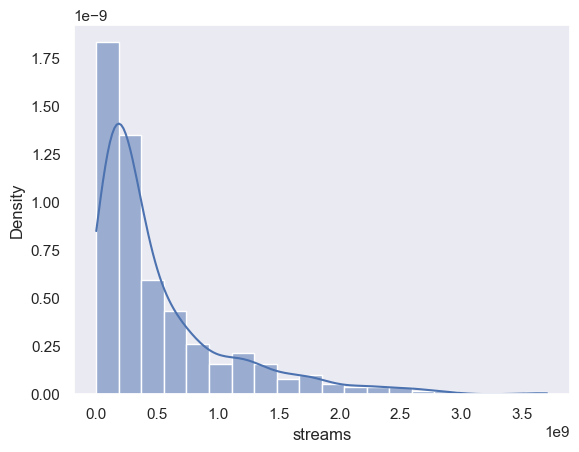

In [9]:
#checking the distribution of streams before filling it up
sns.set(style="dark")

# Create the histogram with KDE
sns.histplot(data['streams'], bins=20, stat="density", kde=True)

plt.show()

The distirbution for Streams is positively skewed.

In [10]:
data['streams'].fillna(data.streams.median(), inplace=True)

In [11]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,15,144,Minor,65,23,80,14,63,11,6


In [12]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [13]:
# numrical_cols = data.select_dtypes(exclude= 'object')
# # numrical_cols
# plt.figure(figsize=(15,15))
# sns.heatmap(numrical_cols.corr(method= 'spearman'), annot=True)

Top 10 songs across lists

In [14]:
top_10_streamed = data.sort_values(by="streams", ascending=False, ignore_index=True)[['track_name','artist(s)_name']]
top_10_streamed.head(10)

,track_name,artist(s)_name
0,Blinding Lights,The Weeknd
1,Shape of You,Ed Sheeran
2,Someone You Loved,Lewis Capaldi
3,Dance Monkey,Tones and I
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee"
5,One Dance,"Drake, WizKid, Kyla"
6,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi"
7,Believer,Imagine Dragons
8,Closer,"The Chainsmokers, Halsey"
9,Starboy,"The Weeknd, Daft Punk"


In [15]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [16]:
df = data
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,15,144,Minor,65,23,80,14,63,11,6


In [17]:
df['released_day'].unique()

array([14, 23, 30, 18,  1, 16,  7, 15, 17, 12, 31,  8, 24, 13, 22,  2, 25,
       29, 28, 21, 19, 10,  9, 26, 27,  6,  4,  3, 20,  5, 11],
      dtype=int64)

#### Analysis of trends over time for streams based on released_year, released_month, and released_day.

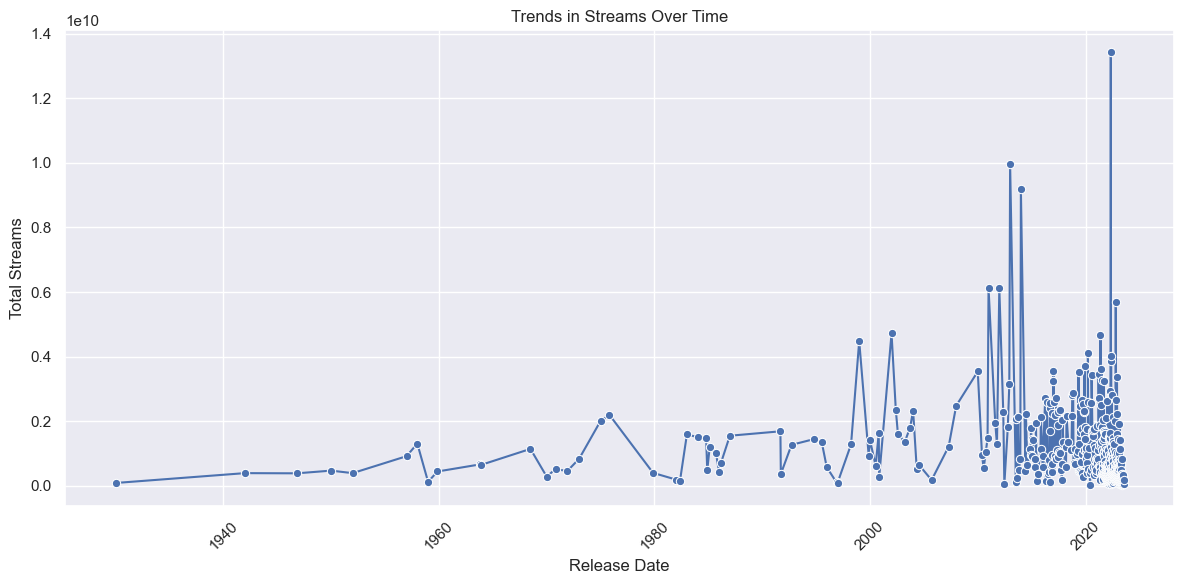

In [18]:
# Combine year, month, and day into a single datetime column
df['release_date'] = pd.to_datetime(dict(year=df['released_year'], month=df['released_month'], day=df['released_day']))

# Group by release date and sum the streams
streams_trends = df.groupby('release_date')['streams'].sum().reset_index()

# Plotting the trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=streams_trends, x='release_date', y='streams', marker='o')

# Adding titles and labels
plt.title('Trends in Streams Over Time')
plt.xlabel('Release Date')
plt.ylabel('Total Streams')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'release_date'],
      dtype='object')

#### see if there are significant differences in streaming numbers across different released_years or artist_count

ANOVA Results for Released Year:
                        sum_sq     df          F        PR(>F)
C(released_year)  1.478201e+20   49.0  17.261804  3.632335e-98
Residual          1.578116e+20  903.0        NaN           NaN

ANOVA Results for Artist Count:
                       sum_sq     df         F    PR(>F)
C(artist_count)  6.034238e+18    7.0  2.719055  0.008526
Residual         2.995975e+20  945.0       NaN       NaN


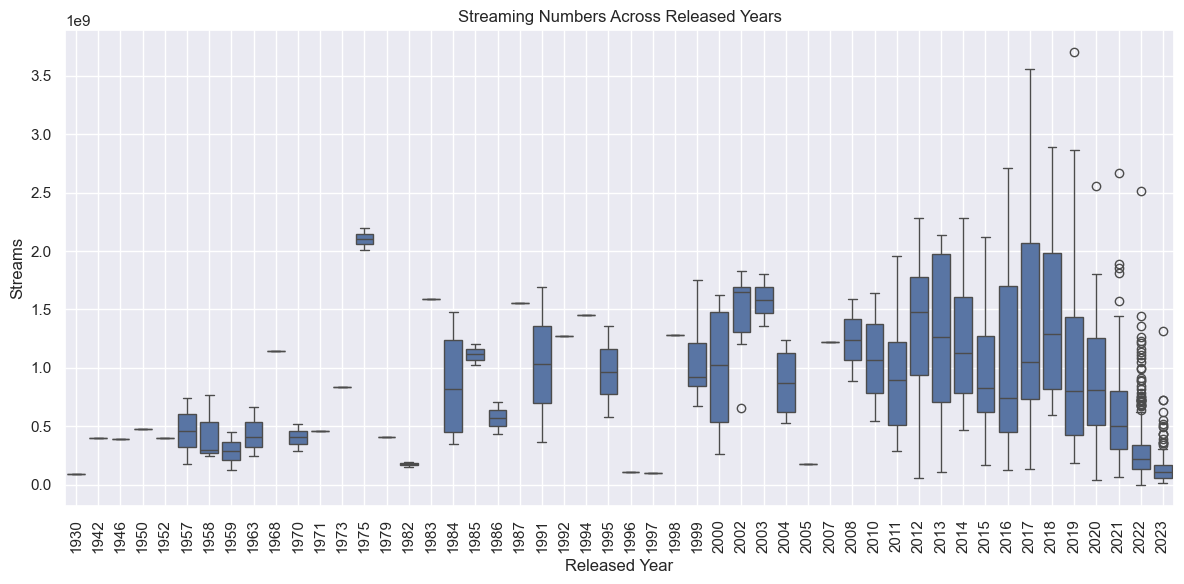

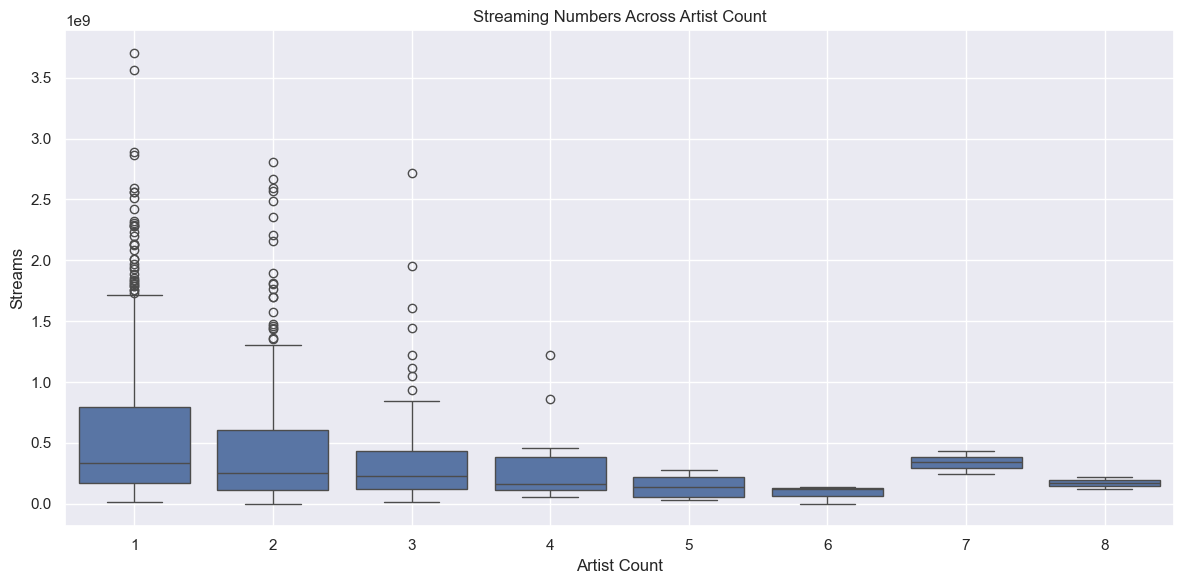

In [20]:
df = data[['track_name','artist(s)_name','released_year','artist_count','streams']]

# ANOVA test for released_year
model_year = ols('streams ~ C(released_year)', data=df).fit()
anova_table_year = sm.stats.anova_lm(model_year, typ=2)

# ANOVA test for artist_count
model_artist = ols('streams ~ C(artist_count)', data=df).fit()
anova_table_artist = sm.stats.anova_lm(model_artist, typ=2)

# Display ANOVA tables
print("ANOVA Results for Released Year:")
print(anova_table_year)

print("\nANOVA Results for Artist Count:")
print(anova_table_artist)

# Visualization of the results for released_year
plt.figure(figsize=(12, 6))
sns.boxplot(x='released_year', y='streams', data=df)
plt.title('Streaming Numbers Across Released Years')
plt.xlabel('Released Year')
plt.xticks(rotation=90)
plt.ylabel('Streams')
plt.grid()
plt.tight_layout()
plt.show()

# Visualization of the results for artist_count
plt.figure(figsize=(12, 6))
sns.boxplot(x='artist_count', y='streams', data=df)
plt.title('Streaming Numbers Across Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.grid()
plt.tight_layout()
plt.show()


- Interpretation:

    - Sum of Squares (sum_sq):
        The variation explained by artist_count is 6.034238e+18, while the residual variation is larger (2.995975e+20), suggesting that while there is some variability explained by the number of artists, it is not as substantial as the overall variation.
    -  Degrees of Freedom (df):
        The df for artist_count is 7, indicating that there are 8 groups (counts of artists) in the data.
    -  F-statistic (F):
        The F-statistic (2.719055) indicates the ratio of variance between groups to the variance within groups. This value suggests there is some difference in the means, but it is less pronounced than in the released_year analysis.
    -  p-value (PR(>F)):
        The p-value (0.008526) is less than 0.05, which indicates that the differences in streaming numbers across different artist_count groups are statistically significant. This means that the number of artists contributing to a track does influence the streaming numbers.

- Summary
    - Released Year: There are significant differences in streaming numbers across different years. This could imply changes in music trends, marketing strategies, or external factors influencing popularity over time.
    - Artist Count: There are significant differences in streaming numbers based on the number of artists involved. This suggests that collaborations or features may impact streaming success, but the effect is not as strong as the effect seen with released year.

<Axes: >

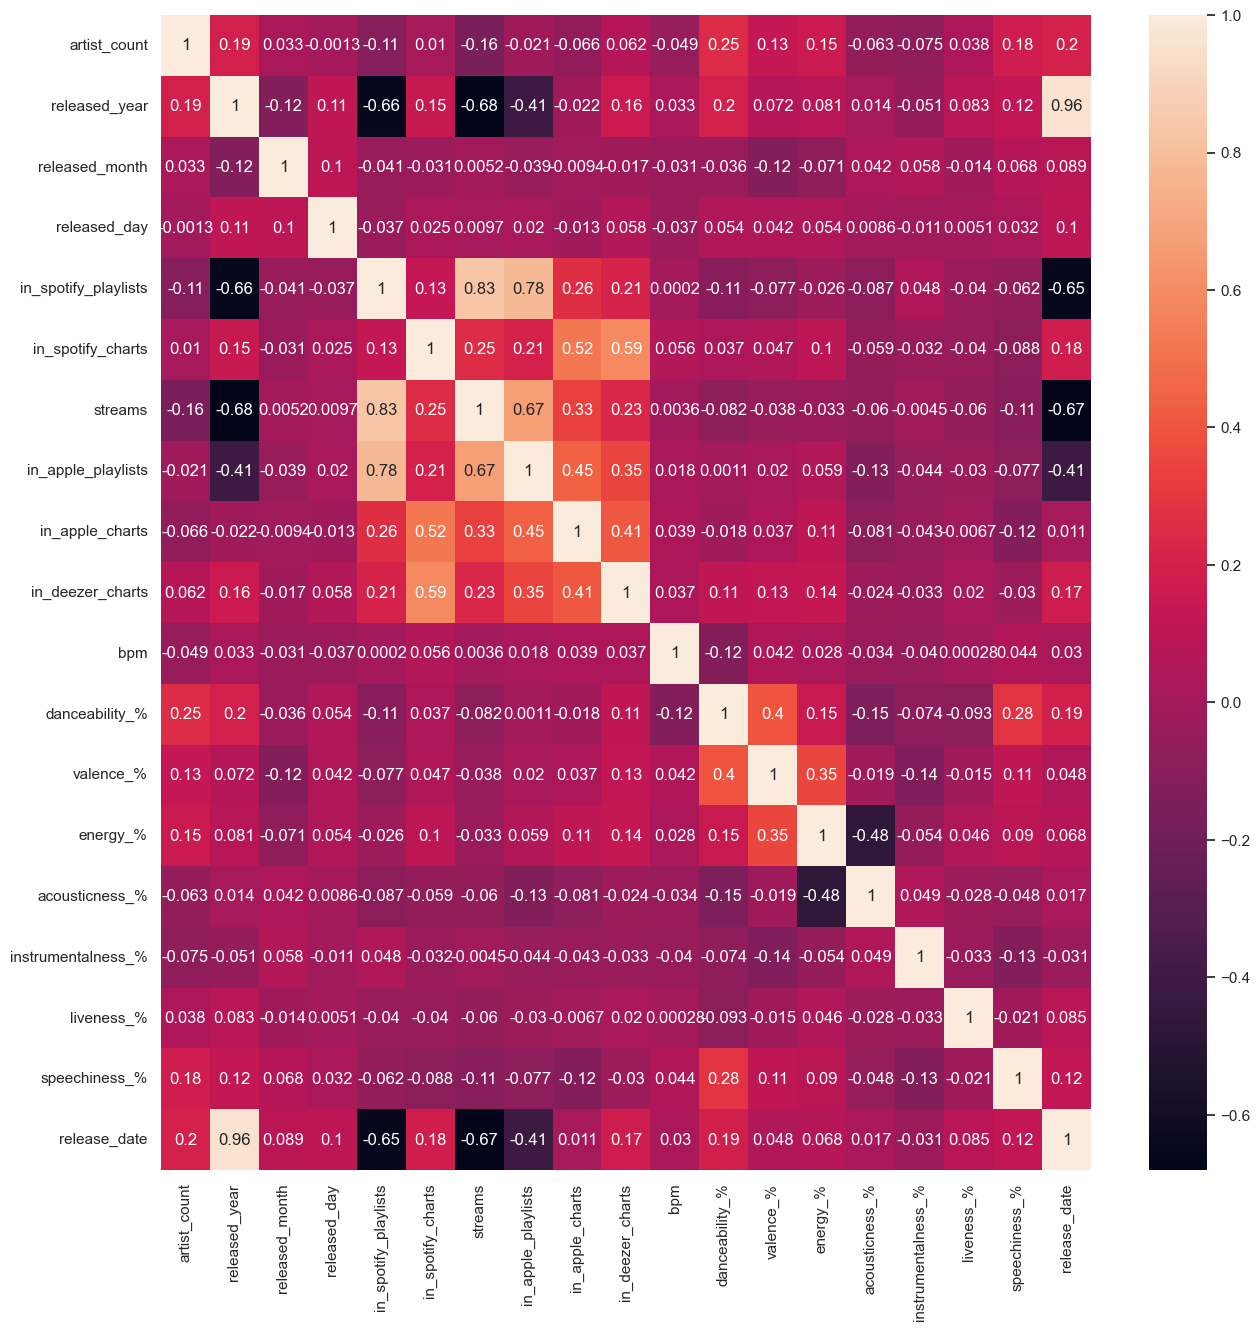

In [27]:
numerical_cols = data.select_dtypes(exclude= 'object')
plt.figure(figsize=(15,15))
sns.heatmap(numerical_cols.corr(method= "spearman"), annot= True,)